In [1]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving iris.txt to iris.txt


In [3]:
import numpy as np
import matplotlib.pyplot as plot
from matplotlib.pyplot import style
style.use("seaborn-darkgrid")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist
import pandas as pd

In [4]:
read_file=open("iris.txt",'r')
read_content= read_file.read()

In [5]:
all_data= read_content.splitlines()
No_data_points=len(all_data)
print ("Number of the data points :- ", No_data_points)
features = all_data[0].split("\t")
No_of_features = len(features)-1
print ("Number the features/samples :- ", No_of_features)

Number of the data points :-  150
Number the features/samples :-  4


In [6]:
D=np.zeros((No_data_points,No_of_features))
true_label = []
counter = 0
for lines in all_data:
    values=lines.split('\t')
    for i in range(0,No_of_features):
        D[counter][i]= values[i]
    true_label.append(int(values[No_of_features]))     #
    counter+=1
#print (D)

In [7]:
df = pd.DataFrame(D, columns = ['s_l','s_w','p_l','p_w'])

In [9]:
#Creating a Function.Normalize the dataset
def normal_dist(x , m , sd):
    z = (x-m)/sd
    return z

In [10]:
df[['s_l']]=normal_dist(df[['s_l']],np.mean(df[['s_l']]),np.std(df[['s_l']]))
df[['s_w']]=normal_dist(df[['s_w']],np.mean(df[['s_w']]),np.std(df[['s_w']]))
df[['p_l']]=normal_dist(df[['p_l']],np.mean(df[['p_l']]),np.std(df[['p_l']]))
df[['p_w']]=normal_dist(df[['p_w']],np.mean(df[['p_w']]),np.std(df[['p_w']]))


In [11]:
#Convert into array again
D=df.values

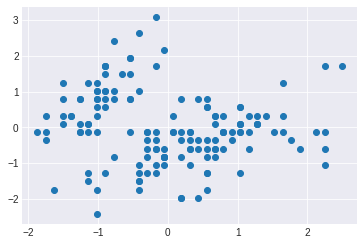

In [12]:
plt.scatter(D[:,0],D[:,1]);

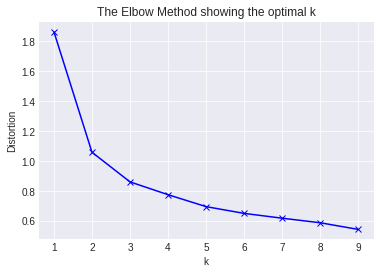

In [13]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(D)
    kmeanModel.fit(D)
    distortions.append(sum(np.min(cdist(D, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / D.shape[0])

# Plot the elbow
plot.plot(K, distortions, 'bx-')
plot.xlabel('k')
plot.ylabel('Distortion')
plot.title('The Elbow Method showing the optimal k')
plot.show()

K - means with K = 3

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(D)
centroids = kmeans.cluster_centers_
label = kmeans.labels_
print ("Cluster Centers are :", centroids)
print ("Labels :", label)

Cluster Centers are : [[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]
Labels : [1 0 0 1 0 2 1 0 0 1 2 0 1 2 0 1 2 0 1 0 2 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1
 2 0 1 2 2 1 2 2 1 0 0 1 2 0 1 2 0 1 2 0 1 2 2 1 0 0 1 2 2 1 2 0 1 2 2 1 2
 0 1 0 0 1 0 2 1 0 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 2 1 2 2 1 0 0 1 0 0
 1 2 0 1 2 2 1 2 0 1 2 0 1 2 0 1 2 2 1 2 0 1 2 0 1 2 0 1 2 2 1 2 0 1 2 0 1
 2 2]


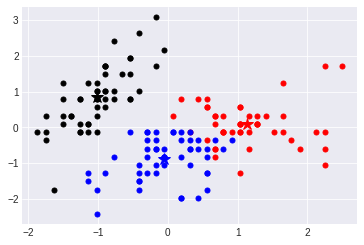

In [15]:
colours = ['r.', 'k.','b.','m.','g.']
for i in range(len(D)):
    plot.plot(D[i][0], D[i][1], colours[label[i]], markersize = 10 )
for i in range(len(centroids)):
    plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )
plot.show()

In [16]:
Sil_score=silhouette_score(D,label)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.45994823920518646


In [17]:
ARI_3=metrics.adjusted_rand_score(true_label, label)
print (ARI_3)

0.6201351808870379


K - means with K = 4


In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(D)
centroids = kmeans.cluster_centers_
label = kmeans.labels_
print ("Cluster Centers are :", centroids)
print ("Labels :", label)

Cluster Centers are : [[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.30780521  0.19950386 -1.30839757 -1.28911786]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-0.72135272  1.5070215  -1.30157708 -1.22066912]]
Labels : [3 0 0 1 0 2 1 0 0 1 2 0 3 2 0 3 2 0 1 0 2 1 2 0 1 2 0 1 2 0 3 2 0 1 2 0 1
 2 0 1 2 2 3 2 2 3 0 0 3 2 0 3 2 0 3 2 0 3 2 2 3 0 0 3 2 2 3 2 0 1 2 2 1 2
 0 1 0 0 1 0 2 3 0 0 3 2 0 1 2 0 1 2 0 3 2 0 3 2 0 3 2 2 1 2 2 1 0 0 3 0 0
 3 2 0 1 2 2 1 2 0 3 2 0 1 2 0 1 2 2 3 2 0 3 2 0 1 2 0 3 2 2 1 2 0 3 2 0 1
 2 2]


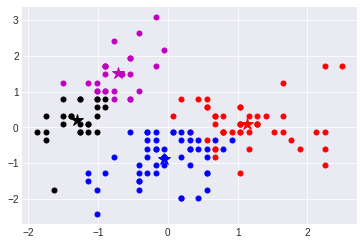

In [20]:
colours = ['r.', 'k.','b.','m.','g.']
for i in range(len(D)):
    plot.plot(D[i][0], D[i][1], colours[label[i]], markersize = 10 )
for i in range(len(centroids)):
    plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )
plot.show()

In [21]:
Sil_score=silhouette_score(D,label)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.383850922475103


In [22]:
ARI_4=metrics.adjusted_rand_score(true_label, label)
print (ARI_4)

0.47056783553918224


K - means with K = 5

In [23]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(D)
centroids = kmeans.cluster_centers_
label = kmeans.labels_
print ("Cluster Centers are :", centroids)
print ("Labels :", label)

Cluster Centers are : [[-0.74922133  1.43007001 -1.29759846 -1.22142131]
 [-0.35279167 -1.33300609  0.10294988  0.01232382]
 [ 0.38167879 -0.39095084  0.60882357  0.56579901]
 [ 1.39733017  0.23316022  1.16062026  1.21734049]
 [-1.35230687  0.11914427 -1.31439133 -1.29749445]]
Labels : [0 3 3 4 2 2 4 3 3 4 1 2 0 2 3 0 2 3 4 2 1 0 1 3 4 2 2 4 1 3 0 1 3 4 2 2 4
 1 3 4 2 2 0 1 2 0 2 3 0 2 2 0 1 3 0 1 3 0 1 1 0 2 3 0 2 2 0 2 3 4 2 2 4 2
 3 4 2 3 0 2 2 0 2 2 0 2 2 4 1 3 4 1 3 0 1 3 0 1 2 0 2 2 4 2 2 4 2 3 0 2 3
 0 1 2 4 2 2 0 1 3 0 1 3 4 2 3 4 1 2 0 1 3 0 1 3 4 2 3 0 2 2 4 2 2 0 1 3 4
 1 2]


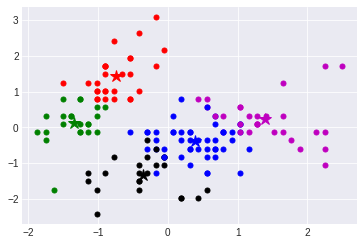

In [24]:
colours = ['r.', 'k.','b.','m.','g.']
for i in range(len(D)):
    plot.plot(D[i][0], D[i][1], colours[label[i]], markersize = 10 )
for i in range(len(centroids)):
    plot.plot(centroids[i][0], centroids[i][1], colours[i], markersize = 12, marker='*' )
plot.show()

In [25]:
Sil_score=silhouette_score(D,label)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.34551099599809465


In [26]:
ARI_5=metrics.adjusted_rand_score(true_label, label)
print (ARI_5)

0.4204810300834166


In [ ]:
# BUHC

In [28]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from random import randint
from math import sqrt
from sklearn.metrics import silhouette_score
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
from sklearn import metrics
linkage_style= "average"

for i in range(3,6):
    agglomerative = cluster.AgglomerativeClustering(n_clusters=i, linkage=linkage_style, affinity='euclidean')
    idx = agglomerative.fit_predict(D)
    hlabels = agglomerative.labels_ 
    print (hlabels) 
    score = silhouette_score(D,hlabels)
    ARI=metrics.adjusted_rand_score(true_label, hlabels)
    print ("Silhouette Score", score)
    print (f'ARI_{i} Score',ARI)

[0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 2 0 1 1 0 1 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 2 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 2 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1
 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0
 1 1]
Silhouette Score 0.4802669329728698
ARI_3 Score 0.5621364251426576
[1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 2 1 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 2 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 2 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 3 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0]
Silhouette Score 0.4067464623524494
ARI_4 Score 0.5522031331345545
[0 1 1 0 1 1 0 1 1 0 4 1 0 1 1 0 1 1 0 1 4 0 4 1 0 1 1 0 4 2 0 4 1 0 1 1 0
 4 1 0 1 1 0 1 1 0 1 1 0 1 1 0 4 2 0 4 1 0 4 4 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 0 4 1 0 4 1 0 4 2 0 4 1 0 1 1 0 1 1 0 1 1 0 1 1
 0 4 1 0 1 1 0 4 1 0 4 1 3 1 

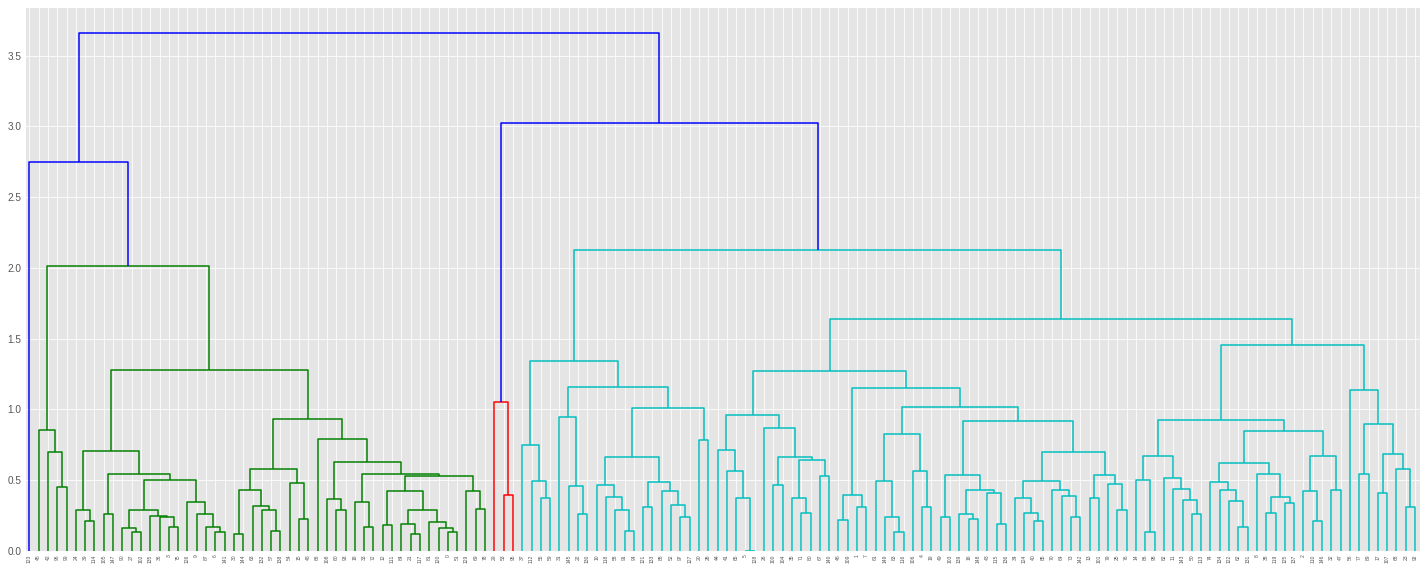

In [30]:
Z = linkage(D, linkage_style)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [ ]:
# FCM

In [31]:
pip install fuzzy-c-means

In [32]:
from fcmeans import FCM

FCM with 3 Clusters

In [33]:
fcm = FCM(n_clusters=3)
fcm.fit(D)

In [34]:
fcm_labels  = fcm.u.argmax(axis=1)
print (fcm_labels)


[1 2 2 1 2 0 1 2 2 1 0 2 1 0 2 1 0 2 1 2 0 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1
 0 2 1 0 0 1 0 2 1 2 2 1 0 2 1 0 2 1 0 2 1 0 0 1 2 2 1 0 0 1 0 2 1 0 0 1 0
 2 1 2 2 1 2 0 1 2 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 2 1 0 0 1 0 0 1 2 2 1 2 2
 1 0 2 1 0 0 1 0 2 1 0 2 1 0 2 1 0 0 1 0 2 1 0 2 1 0 2 1 0 0 1 0 2 1 0 2 1
 0 0]


In [35]:

Sil_score=silhouette_score(D,fcm_labels)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.45844171606773937


In [36]:
from sklearn import metrics
ARI=metrics.adjusted_rand_score(true_label, fcm_labels)
print (ARI)

0.6303393343888227


FCM with 4 Clusters

In [37]:
fcm = FCM(n_clusters=4)
fcm.fit(D)

In [38]:
fcm_labels  = fcm.u.argmax(axis=1)
print (fcm_labels)

[0 1 1 0 3 3 0 1 1 0 2 3 0 3 1 0 2 1 0 3 2 0 2 1 0 3 3 0 2 1 0 2 1 0 3 3 0
 2 1 0 3 2 0 2 3 0 3 1 0 3 1 0 2 1 0 2 1 0 2 2 0 3 1 0 3 3 0 3 1 0 3 3 0 3
 1 0 3 1 0 3 3 0 3 3 0 3 3 0 2 1 0 2 1 0 2 1 0 2 1 0 3 3 0 3 3 0 3 1 0 3 1
 0 2 1 0 3 3 0 2 1 0 2 1 2 3 1 0 2 3 0 2 1 0 2 1 0 3 1 0 3 3 0 3 1 0 2 1 0
 2 3]


In [39]:

Sil_score=silhouette_score(D,fcm_labels)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.40166519755723556


In [40]:
from sklearn import metrics
ARI=metrics.adjusted_rand_score(true_label, fcm_labels)
print (ARI)

0.5877101724547279


FCM with 5 Clusters

In [44]:
fcm = FCM(n_clusters=5)
fcm.fit(D)

In [45]:
fcm_labels  = fcm.u.argmax(axis=1)
print (fcm_labels)

[2 3 0 2 3 1 2 3 0 2 4 3 2 3 0 2 1 0 2 3 4 2 4 0 2 3 3 2 4 0 2 4 0 2 1 3 2
 4 0 2 1 1 2 1 3 2 3 0 2 1 3 2 4 0 2 4 0 2 4 4 2 3 0 2 1 1 2 1 0 2 1 3 2 1
 0 2 3 0 2 3 3 2 3 3 2 1 3 2 4 0 2 4 0 2 4 0 2 4 3 2 1 3 2 1 1 2 1 0 2 3 0
 2 4 3 2 1 3 2 4 0 2 4 0 4 1 0 2 4 1 2 4 0 2 4 0 2 1 0 2 1 3 2 1 3 2 4 0 2
 1 1]


In [46]:

Sil_score=silhouette_score(D,fcm_labels)
print ("Silhouette Score: ", Sil_score)

Silhouette Score:  0.34484024066672936


In [47]:
from sklearn import metrics
ARI=metrics.adjusted_rand_score(true_label, fcm_labels)
print (ARI)

0.5617346375631308


In [48]:
#!pip install tabulate

In [49]:
from tabulate import tabulate

In [50]:
print(tabulate([['K3', 0.45994823920518646,0.6201351808870379], ['K4', 0.38822009621659853,0.44406452893311793],['K5', 0.3459012795948779,0.4348193730457166]], headers=['K‐means', 'Silhouette Score','ARI']))
print('                   ')
print(tabulate([['K3', 0.4802669329728698,0.5621364251426576], ['K4', 0.4067464623524494,0.5522031331345545],['K5', 0.37460125385424414,0.5509110143971174]], headers=['BUHC', 'Silhouette Score','ARI']))

print('                   ')
print(tabulate([['K3', 0.45844171606773937,0.6303393343888227], ['K4', 0.40166519755723556,0.5877101724547279],['K5', 0.34484024066672936,0.5617346375631308]], headers=['FCM', 'Silhouette Score','ARI']))


K‐means      Silhouette Score       ARI
---------  ------------------  --------
K3                   0.459948  0.620135
K4                   0.38822   0.444065
K5                   0.345901  0.434819
                   
BUHC      Silhouette Score       ARI
------  ------------------  --------
K3                0.480267  0.562136
K4                0.406746  0.552203
K5                0.374601  0.550911
                   
FCM      Silhouette Score       ARI
-----  ------------------  --------
K3               0.458442  0.630339
K4               0.401665  0.58771
K5               0.34484   0.561735
